# Project 2: Personality vs Drug Use

Sebastian and Laura

## Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # To display all columns
import xlrd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


## Reading in Data, Cleaning Data and adding actual values for visualizations

In [2]:
df = pd.read_excel('Data/drug_consumption.xls')

We delete every row where a participant indicated the use of 'Semeron', which is a fictional, non existing drug, used to pick out individuals who are exaggerating their drug use:

In [3]:
df1 = df.drop(df.loc[df["Semer"] != "CL0"].index)

In [4]:
df1.drop('Semer', inplace=True, axis=1)

Reassigning "real" values for Gender, Country & Education, for better visualizations

In [5]:
Gencat = df1['Gender'].apply(lambda x: 1 if x > 0 else 0)
df1["Gender"] = Gencat
df1["Gender"] = df1["Gender"].astype("category")

In [6]:
Countrycat = df1['Country'].apply(lambda x: {(-0.09765):'Australia', 
                                             0.24923:'Canada',
                                             0.96082:'UK',
                                            (-0.46841):'New Zealand',
                                            (-0.28519):'Other',
                                            (0.21128):'R.o.Ireland',
                                            (-0.57009):'USA'}.get(x,''))
df1.insert(5, "Country_Name", Countrycat)
df1["Country_Name"] = df1["Country_Name"].astype("category")

In [7]:
Educat = df1['Education'].apply(lambda x: {(-2.43591): "under 16y",
                                           (-1.73790): "16y",
                                           (-1.43719): "17y",
                                           (-1.22751): '18y',
                                           (-0.61113):'College/Uni',
                                           (-0.05921):'Cert./Diploma',
                                           (0.45468): 'Uni Degree', 
                                           (1.16365):'Master',
                                           (1.98437): 'PhD'}.get(x,''))
df1.insert(4, "Education_Level", Educat)
df1["Education_Level"] = df1["Education_Level"].astype("category")

In [8]:
Ethinicitycat = df1["Ethnicity"].apply(lambda x: {(-0.50212): "Asian",
                                           (-1.10702): "Black",
                                           (1.90725): "Mixed-Black/Asian",
                                           (0.12600): 'Mixed-White/Asian',
                                           (-0.22166):'Mixed-White/Black',
                                           (0.11440):'Other',
                                           (-0.31685): 'White'}.get(x,''))
df1.insert(8, "Ethnicity_Label", Ethinicitycat)
df1["Ethnicity_Label"] = df1["Ethnicity_Label"].astype("category")

In [9]:
Agecat = df1["Age"].apply(lambda x: {(-0.95197): "18-24",
                                           (-0.07854): "25-34",
                                           (0.49788): "35-44",
                                           (1.09449): '45-54',
                                           (1.82213):'55-64',
                                           (2.59171):'65+'}.get(x,''))
df1.insert(2, "Age_Cat", Agecat)
df1["Age_Cat"] = df1["Age_Cat"].astype("category")

## Getting an overview of the Data

### Overview of who particpated in this study

In [10]:
custom_palette_gender = ["navy", "indianred"]

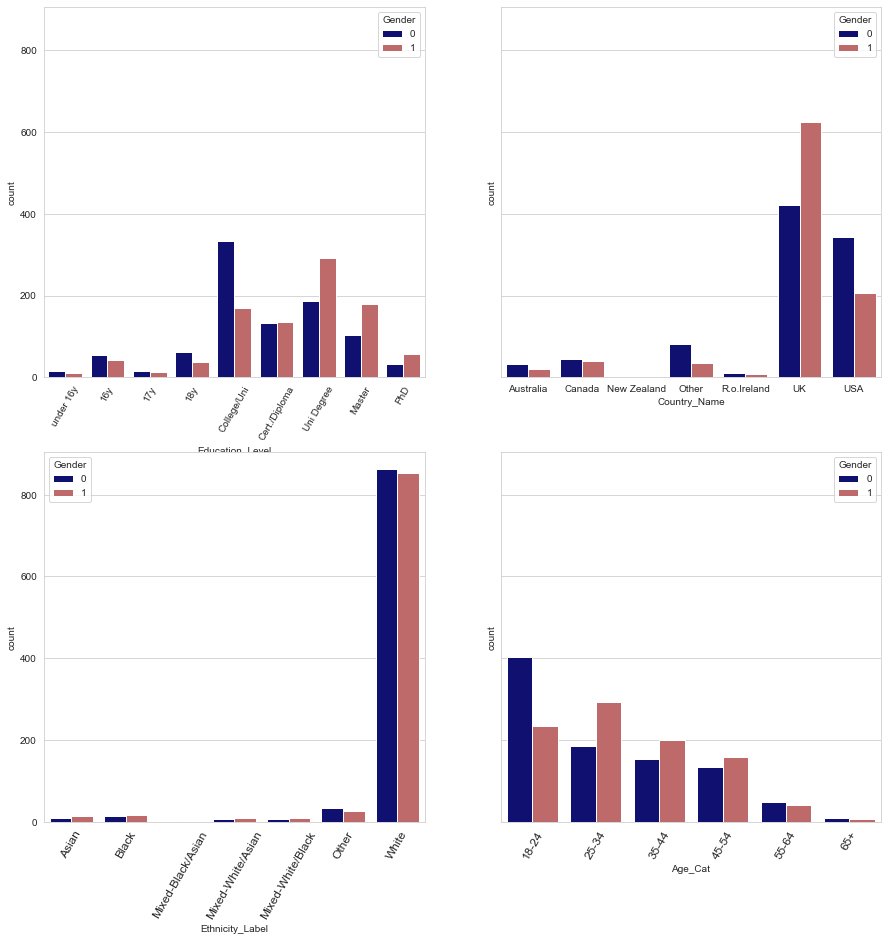

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 15), sharey=True)

sns.set_palette(custom_palette_gender)

edu_order = ["under 16y", "16y", "17y", '18y', 'College/Uni', 'Cert./Diploma', 'Uni Degree', 'Master', 'PhD']
ethnicity_order = ["Asian", "Black", "Mixed-Black/Asian", "Mixed-White/Asian", "Mixed-White/Black", "Other", "White"]
age_order = ["18-24", "25-34", "35-44", '45-54', "55-64",'65+']

g = sns.countplot(data=df1, x="Education_Level", order = edu_order, hue='Gender', ax=axes[0][0])
g.set_xticklabels(edu_order, rotation=60)

g1 = sns.countplot(data=df1, x="Country_Name", hue='Gender', ax=axes[0][1])
plt.xticks(rotation=60, size = 12);

g2 = sns.countplot(data=df1, x="Ethnicity_Label", hue='Gender', ax=axes[1][0])
g2.set_xticklabels(ethnicity_order, rotation=60, size = 12);

g3 = sns.countplot(data=df1, x="Age_Cat", hue='Gender', ax=axes[1][1])
g3.set_xticklabels(age_order, rotation=60, size = 12);

### Overview of drug usage

<AxesSubplot:xlabel='VSA', ylabel='count'>

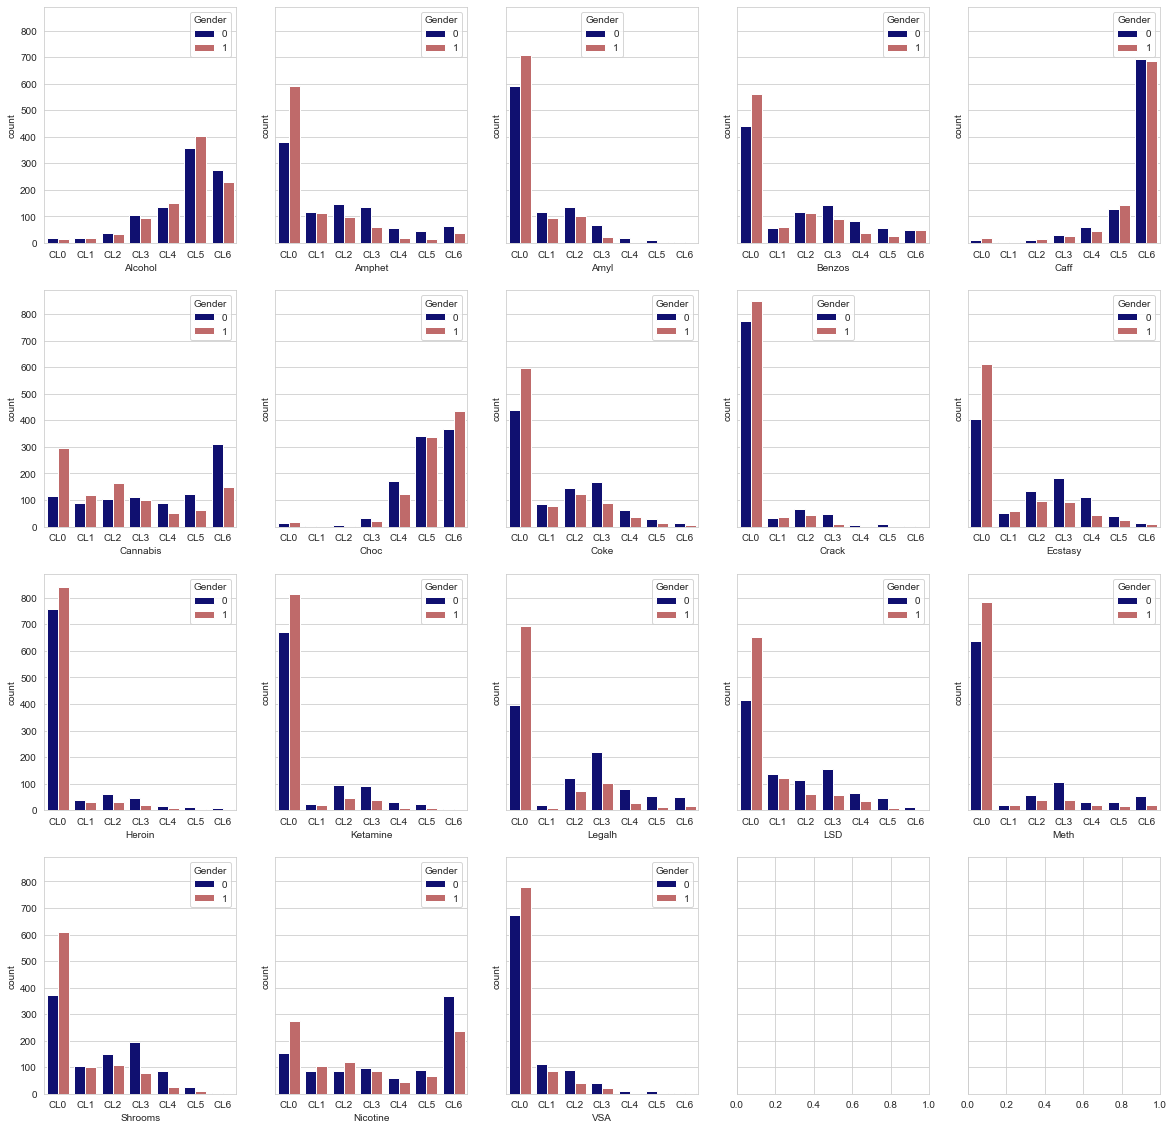

In [12]:
clsorder = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

f, axes = plt.subplots(4, 5, figsize=(20, 20), sharey=True)

sns.set_palette(custom_palette_gender)

sns.countplot(data=df1, x="Alcohol", order = clsorder, hue='Gender', ax=axes[0, 0])
sns.countplot(data=df1, x="Amphet", order = clsorder, hue='Gender', ax=axes[0, 1])
sns.countplot(data=df1, x="Amyl", order = clsorder, hue='Gender', ax=axes[0, 2])
sns.countplot(data=df1, x="Benzos", order = clsorder, hue='Gender', ax=axes[0, 3])
sns.countplot(data=df1, x="Caff", order = clsorder, hue='Gender', ax=axes[0, 4])
sns.countplot(data=df1, x="Cannabis", order = clsorder, hue='Gender', ax=axes[1, 0])
sns.countplot(data=df1, x="Choc", order = clsorder, hue='Gender', ax=axes[1, 1])
sns.countplot(data=df1, x="Coke", order = clsorder, hue='Gender', ax=axes[1, 2])
sns.countplot(data=df1, x="Crack", order = clsorder, hue='Gender', ax=axes[1, 3])
sns.countplot(data=df1, x="Ecstasy", order = clsorder, hue='Gender', ax=axes[1, 4])
sns.countplot(data=df1, x="Heroin", order = clsorder, hue='Gender', ax=axes[2, 0])
sns.countplot(data=df1, x="Ketamine", order = clsorder, hue='Gender', ax=axes[2, 1])
sns.countplot(data=df1, x="Legalh", order = clsorder, hue='Gender', ax=axes[2, 2])
sns.countplot(data=df1, x="LSD", order = clsorder, hue='Gender', ax=axes[2, 3])
sns.countplot(data=df1, x="Meth", order = clsorder, hue='Gender', ax=axes[2, 4])
sns.countplot(data=df1, x="Shrooms", order = clsorder, hue='Gender', ax=axes[3, 0])
sns.countplot(data=df1, x="Nicotine", order = clsorder, hue='Gender', ax=axes[3, 1])
sns.countplot(data=df1, x="VSA", order = clsorder, hue='Gender', ax=axes[3, 2])

There are only 3 people who never consumed alcohol and chocolate and just 1 person never consumed any drugs at all:

In [13]:
df1[(df1["Alcohol"] == "CL0") & (df1["Choc"] == "CL0")]

,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA
330,333,1.82213,55-64,1,-1.22751,18y,0.24923,Canada,-0.31685,White,-0.46725,-0.43999,-1.55521,0.94156,0.75830,-1.37983,-1.54858,CL0,CL0,CL0,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL5,CL0
1277,1281,-0.95197,18-24,0,0.45468,Uni Degree,0.96082,UK,-0.50212,Asian,0.82562,0.63779,-0.84732,-2.21844,0.93949,1.86203,1.92173,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1743,1747,0.49788,35-44,1,1.16365,Master,0.96082,UK,-1.10702,Black,-0.24649,-0.57545,-0.58331,0.13136,0.12331,-0.21712,-1.18084,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


### Overview of personality traits 

In [14]:
df1.head()

,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA
0,1,0.49788,35-44,1,-0.05921,Cert./Diploma,0.96082,UK,0.12600,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,2,-0.07854,25-34,0,1.98437,PhD,0.96082,UK,-0.31685,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,3,0.49788,35-44,0,-0.05921,Cert./Diploma,0.96082,UK,-0.31685,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,4,-0.95197,18-24,1,1.16365,Master,0.96082,UK,-0.31685,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,5,0.49788,35-44,1,1.98437,PhD,0.96082,UK,-0.31685,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


The distribution of the personality score for both males and females are very similar. This is the reason of why we stacked the bars insted of plotting both (it was very hard to see anything).

<AxesSubplot:xlabel='SS', ylabel='Count'>

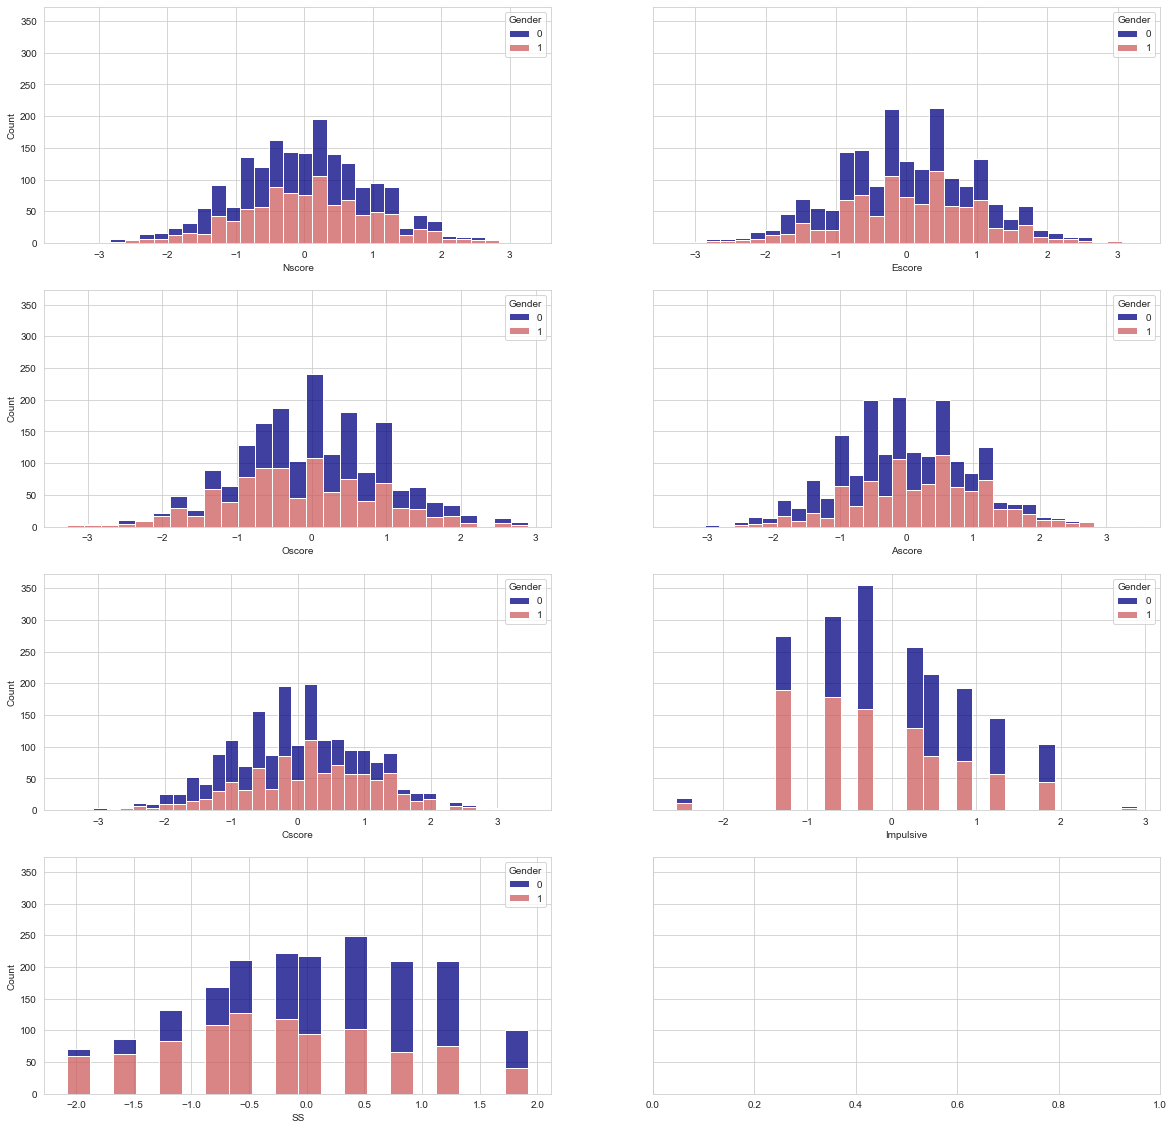

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 20), sharey=True)
sns.set_palette(custom_palette_gender)

sns.histplot(data=df1, x="Nscore", hue='Gender', multiple="stack", ax=axes[0][0])
sns.histplot(data=df1, x="Escore", hue='Gender', multiple="stack", ax=axes[0][1])
sns.histplot(data=df1, x="Oscore", hue='Gender', multiple="stack", ax=axes[1][0])
sns.histplot(data=df1, x="Ascore", hue='Gender', multiple="stack", ax=axes[1][1])
sns.histplot(data=df1, x="Cscore", hue='Gender', multiple="stack", ax=axes[2][0])
sns.histplot(data=df1, x="Impulsive", hue='Gender', multiple="stack", ax=axes[2][1])
sns.histplot(data=df1, x="SS", hue='Gender', multiple="stack", ax=axes[3][0])

## Classification of drug usage in users and non-users

Formally, the only individuals who can be considered non-users are individuals in Class 0, however individuals who used a drug more than a decade ago cannot be considered a drug user for most applications.
There are several possible way to discriminate participants into groups of users and non-users for binary classification. We decided to define non-user as anyone who has never taken the drug (CL0) or taken the drug over a decade ago (CL1) and anyone else as a user (CL2, CL3, CL4, CL5 and CL6).

In [16]:
df1.head()

,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA
0,1,0.49788,35-44,1,-0.05921,Cert./Diploma,0.96082,UK,0.12600,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,2,-0.07854,25-34,0,1.98437,PhD,0.96082,UK,-0.31685,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,3,0.49788,35-44,0,-0.05921,Cert./Diploma,0.96082,UK,-0.31685,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,4,-0.95197,18-24,1,1.16365,Master,0.96082,UK,-0.31685,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,5,0.49788,35-44,1,1.98437,PhD,0.96082,UK,-0.31685,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


In [17]:
drugs = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack",
        "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Shrooms", "Nicotine", "VSA"]

for element in drugs:
    column_insert = df1.columns.get_loc(element)+1
    col_name = element+"_Cat"
    cat = df1[element].apply(lambda x: 0 if (x == "CL0" or x == "CL1") else 1)
    df1.insert(column_insert, col_name, cat)
    df1[col_name] = df1[col_name].astype("category")

## Categorizing the different drugs into 3 groups

In [18]:
drugs_cat = ["Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat",
        "Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"]

user_total = []
non_user_total = []

for element in drugs_cat:
    user = df1[element].value_counts(normalize=True).sort_index()[1]
    non_user = df1[element].value_counts(normalize=True).sort_index()[0]
    user_total.append(user)
    non_user_total.append(non_user)

total_user = pd.DataFrame([drugs_cat, user_total, non_user_total], index=["Drug", "User", "Non_user"]).T

In [19]:
total_user.query("User > 0.6")

,Drug,User,Non_user
0,Alcohol_Cat,0.964305,0.0356953
4,Caff_Cat,0.980288,0.0197123
5,Cannabis_Cat,0.669686,0.330314
6,Choc_Cat,0.981886,0.018114
16,Nicotine_Cat,0.669153,0.330847


In [20]:
total_user.query("User < 0.6 and User > 0.25")

,Drug,User,Non_user
1,Amphet_Cat,0.359084,0.640916
3,Benzos_Cat,0.405967,0.594033
7,Coke_Cat,0.362813,0.637187
9,Ecstasy_Cat,0.39691,0.60309
12,Legalh_Cat,0.40277,0.59723
13,LSD_Cat,0.293554,0.706446
15,Shrooms_Cat,0.36601,0.63399


In [21]:
total_user.query("User < 0.25")

,Drug,User,Non_user
2,Amyl_Cat,0.196058,0.803942
8,Crack_Cat,0.10016,0.89984
10,Heroin_Cat,0.111348,0.888652
11,Ketamine_Cat,0.184337,0.815663
14,Meth_Cat,0.220565,0.779435
17,VSA_Cat,0.120405,0.879595


Making a dataframe for each ob the drug subgroups:

In [22]:
df_group1_drugs = df1.drop(["Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Coke_Cat", "Crack_Cat", "Ecstasy_Cat", 'Heroin_Cat', 'Ketamine_Cat',
                       'Legalh_Cat', 'LSD_Cat', 'Meth_Cat', 'Shrooms_Cat', 'VSA_Cat', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 
                       'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
                       'Nicotine', 'VSA'], axis=1)

df_group2_drugs = df1.drop(["Alcohol_Cat", "Amyl_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Crack_Cat",
        "Heroin_Cat", "Ketamine_Cat", "Meth_Cat", "Nicotine_Cat", "VSA_Cat", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack",
        "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Shrooms", "Nicotine", "VSA"], axis=1)

df_group3_drugs = df1.drop(["Alcohol_Cat", "Amphet_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat",
        "Ecstasy_Cat", "Legalh_Cat", "LSD_Cat", "Shrooms_Cat", "Nicotine_Cat", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack",
        "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Shrooms", "Nicotine", "VSA"], axis=1)

Changing the binary classification to integers for each of the drugs in the 3 drug subgroup dataframes:

In [23]:
df_group1_drugs["Alcohol_Cat"] = df_group1_drugs["Alcohol_Cat"].astype(int)
df_group1_drugs["Caff_Cat"] = df_group1_drugs["Caff_Cat"].astype(int)
df_group1_drugs["Cannabis_Cat"] = df_group1_drugs["Cannabis_Cat"].astype(int)
df_group1_drugs["Choc_Cat"] = df_group1_drugs["Choc_Cat"].astype(int)
df_group1_drugs["Nicotine_Cat"] = df_group1_drugs["Nicotine_Cat"].astype(int)

In [24]:
df_group2_drugs["Amphet_Cat"] = df_group2_drugs["Amphet_Cat"].astype(int)
df_group2_drugs["Benzos_Cat"] = df_group2_drugs["Benzos_Cat"].astype(int)
df_group2_drugs["Coke_Cat"] = df_group2_drugs["Coke_Cat"].astype(int)
df_group2_drugs["Ecstasy_Cat"] = df_group2_drugs["Ecstasy_Cat"].astype(int)
df_group2_drugs["Legalh_Cat"] = df_group2_drugs["Legalh_Cat"].astype(int)
df_group2_drugs["LSD_Cat"] = df_group2_drugs["LSD_Cat"].astype(int)
df_group2_drugs["Shrooms_Cat"] = df_group2_drugs["Shrooms_Cat"].astype(int)

In [25]:
df_group3_drugs["Amyl_Cat"] = df_group3_drugs["Amyl_Cat"].astype(int)
df_group3_drugs["Crack_Cat"] = df_group3_drugs["Crack_Cat"].astype(int)
df_group3_drugs["Heroin_Cat"] = df_group3_drugs["Heroin_Cat"].astype(int)
df_group3_drugs["Ketamine_Cat"] = df_group3_drugs["Ketamine_Cat"].astype(int)
df_group3_drugs["Meth_Cat"] = df_group3_drugs["Meth_Cat"].astype(int)
df_group3_drugs["VSA_Cat"] = df_group3_drugs["VSA_Cat"].astype(int)

Assigning user or non-user (1 or 0) for each of the drug groups and storing this in a few dataframe:

In [26]:
df2 = df1.copy()

In [27]:
drugs1=["Alcohol_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Nicotine_Cat"]
df2['Group1_drugs']= df_group1_drugs["Alcohol_Cat"] + df_group1_drugs["Caff_Cat"] + df_group1_drugs["Cannabis_Cat"] + df_group1_drugs["Choc_Cat"] + df_group1_drugs["Nicotine_Cat"]
df2['Group1_drugs'] = df2['Group1_drugs'].apply(lambda x: 1 if x > 0 else 0)


In [28]:
drugs2=["Amphet_Cat", "Benzos_Cat", "Coke_Cat", "Ecstasy_Cat", "Legalh_Cat", "LSD_Cat", "Shrooms_Cat"]
df2['Group2_drugs']= df_group2_drugs["Amphet_Cat"] + df_group2_drugs["Benzos_Cat"] + df_group2_drugs["Coke_Cat"] + df_group2_drugs["Ecstasy_Cat"] + df_group2_drugs["Legalh_Cat"] + df_group2_drugs["LSD_Cat"]+ df_group2_drugs["Shrooms_Cat"]
df2['Group2_drugs'] = df2['Group2_drugs'].apply(lambda x: 1 if x > 0 else 0)


In [29]:
drugs3=["Amyl_Cat", "Crack_Cat", "Heroin_Cat", "Ketamine_Cat", "Meth_Cat", "VSA_Cat"]
df2['Group3_drugs']= df_group3_drugs["Amyl_Cat"] + df_group3_drugs["Crack_Cat"] + df_group3_drugs["Heroin_Cat"] + df_group3_drugs["Ketamine_Cat"] + df_group3_drugs["Meth_Cat"] + df_group3_drugs["VSA_Cat"]
df2['Group3_drugs'] = df2['Group3_drugs'].apply(lambda x: 1 if x > 0 else 0)

In [30]:
df2.drop(["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack","Ecstasy", "Heroin", "Ketamine",
          "Legalh", "LSD", "Meth", "Shrooms", "Nicotine", "VSA", "Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat",
          "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat","Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", 
          "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"], axis=1, inplace=True)

In [31]:
df2

,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Group1_drugs,Group2_drugs,Group3_drugs
0,1,0.49788,35-44,1,-0.05921,Cert./Diploma,0.96082,UK,0.12600,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0
1,2,-0.07854,25-34,0,1.98437,PhD,0.96082,UK,-0.31685,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1
2,3,0.49788,35-44,0,-0.05921,Cert./Diploma,0.96082,UK,-0.31685,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
3,4,-0.95197,18-24,1,1.16365,Master,0.96082,UK,-0.31685,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,1
4,5,0.49788,35-44,1,1.98437,PhD,0.96082,UK,-0.31685,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,18-24,1,-0.61113,College/Uni,-0.57009,USA,-0.31685,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1,1,1
1881,1885,-0.95197,18-24,0,-0.61113,College/Uni,-0.57009,USA,-0.31685,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1,1,1
1882,1886,-0.07854,25-34,1,0.45468,Uni Degree,-0.57009,USA,-0.31685,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,1,1
1883,1887,-0.95197,18-24,1,-0.61113,College/Uni,-0.57009,USA,-0.31685,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1,1,0


## Drug usage comparison in the UK and the USA

We are going to look at how drug consumption varies between the USA and the UK. We cannot include the other countries in this study as there are too few respondants from those countries (Australia 54, Canada 87, New Zealand 5, Republic or Ireland 20 and Other 118).  
We have 557 respondant from the USA which accounts to 29.55%, and 1044 respondants from the UK, accounting to 55.38%.  
As there are more respondants from the UK than the USA, we are going to compare percentages.

In [32]:
df1_uk_usa = df1[(df1['Country_Name'].isin(['UK','USA']))]
df1_uk = df1[(df1['Country_Name'] == "UK")]
df1_usa = df1[(df1['Country_Name'] == "USA")]

In [33]:
drugs_cat = ["Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat",
        "Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"]

uk_user_percentage = []
uk_non_user_percentage = []

for element in drugs_cat:
    user = df1_uk[element].value_counts(normalize=True).sort_index()[1]
    non_user = df1_uk[element].value_counts(normalize=True).sort_index()[0]
    uk_user_percentage.append(user)
    uk_non_user_percentage.append(non_user)

uk_user = pd.DataFrame([drugs_cat, uk_user_percentage, uk_non_user_percentage], index=["Drug", "User", "Non_user"]).T

In [34]:
drugs_cat = ["Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat",
        "Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"]

usa_user_percentage = []
usa_non_user_percentage = []

for element in drugs_cat:
    user = df1_usa[element].value_counts(normalize=True).sort_index()[1]
    non_user = df1_usa[element].value_counts(normalize=True).sort_index()[0]
    usa_user_percentage.append(user)
    usa_non_user_percentage.append(non_user)

usa_user = pd.DataFrame([drugs_cat, usa_user_percentage, usa_non_user_percentage], index=["Drug", "User", "Non_user"]).T

<ipython-input-35-a93a9cee7bb8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drugs_cat, rotation=90, size = 12);
<ipython-input-35-a93a9cee7bb8>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(drugs_cat, rotation=90, size = 12);


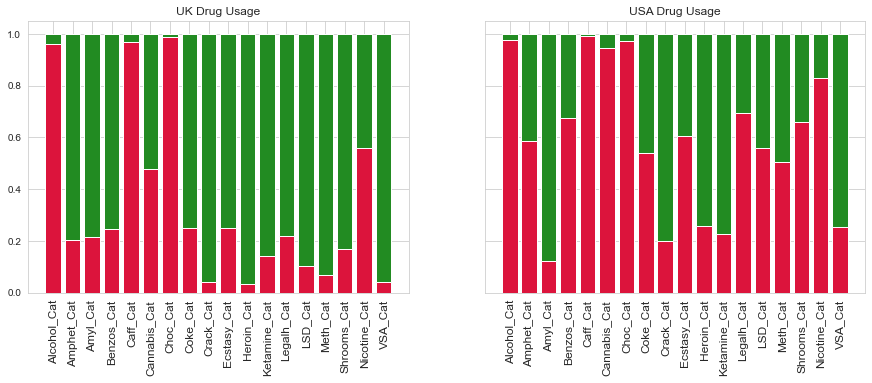

In [35]:
drugs_cat = ["Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat",
        "Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

ax1.bar(uk_user["Drug"], uk_user["User"], color='crimson', edgecolor='white')
ax1.bar(uk_user["Drug"], uk_user["Non_user"], bottom=uk_user["User"], color='forestgreen', edgecolor='white')
ax1.set_title('UK Drug Usage')
ax1.set_xticklabels(drugs_cat, rotation=90, size = 12);

ax2.bar(usa_user["Drug"], usa_user["User"], color='crimson', edgecolor='white')
ax2.bar(usa_user["Drug"], usa_user["Non_user"], bottom=usa_user["User"], color='forestgreen', edgecolor='white')
ax2.set_title('USA Drug Usage')
ax2.set_xticklabels(drugs_cat, rotation=90, size = 12);